# Analyse du parcours étudiant et des facteurs de succès professionnel

## Introduction

Cette analyse explore un ensemble de données riche concernant les parcours académiques et professionnels d'étudiants. Les données couvrent quatre dimensions principales : informations personnelles, performances académiques, compétences et activités extrascolaires, et résultats de carrière. L'objectif est d'identifier les facteurs qui influencent la réussite professionnelle et de comprendre les corrélations entre les différentes étapes du parcours étudiant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Columns Description
1. Student Information
- Student_ID – Unique identifier for each student
- Age – Age of the student (18-30 years)
- Gender – Male, Female, or Other
2. Academic Performance
- High_School_GPA – High school GPA (2.0 - 4.0 scale)
- SAT_Score – Standardized test score (900 - 1600)
- University_Ranking – Ranking of the university attended (1-1000)
- University_GPA – University GPA (2.0 - 4.0 scale)
- Field_of_Study – Major or discipline (e.g., Computer Science, Medicine, Business)
3. Skills & Extracurricular Activities
- Internships_Completed – Number of internships completed (0-4)
- Projects_Completed – Number of personal/academic projects completed (0-9)
- Certifications – Number of additional certifications earned (0-5)
- Soft_Skills_Score – Soft skills rating (1-10)
- Networking_Score – Score based on professional networking and connections (1-10)
4. Career Outcomes
- Job_Offers – Number of job offers received after graduation (0-5)
- Starting_Salary – First job salary in USD ($25,000 - $150,000)
- Career_Satisfaction – Career satisfaction level (1-10)
- Years_to_Promotion – Time taken to receive the first promotion (1-5 years)
- Current_Job_Level – Career level (Entry, Mid, Senior, Executive)
- Work_Life_Balance – Work-life balance rating (1-10)
- Entrepreneurship – Whether the individual started a business (Yes/No)

In [2]:
def load_dataset_part(parts: list):
    df = pd.read_csv('datasets/ds.csv')
    if not 1 in parts:
        df = df.drop(["Age", "Gender"], axis=1)
    if not 2 in parts:
        df = df.drop(["High_School_GPA", "SAT_Score", "University_Ranking", "University_GPA", "Field_of_Study"], axis=1)
    if not 3 in parts:
        df = df.drop(["Internships_Completed", "Projects_Completed", "Certifications", "Soft_Skills_Score", "Networking_Score"], axis=1)
    if not 4 in parts:
        df = df.drop(["Job_Offers", "Starting_Salary", "Career_Satisfaction", "Years_to_Promotion", "Current_Job_Level", "Work_Life_Balance", "Entrepreneurship"], axis=1)
    return df

In [3]:
df = load_dataset_part([1])
df.loc[:,"Gender"].value_counts()

Gender
Male      2458
Female    2350
Other      192
Name: count, dtype: int64

## Analyse des disparités sociales

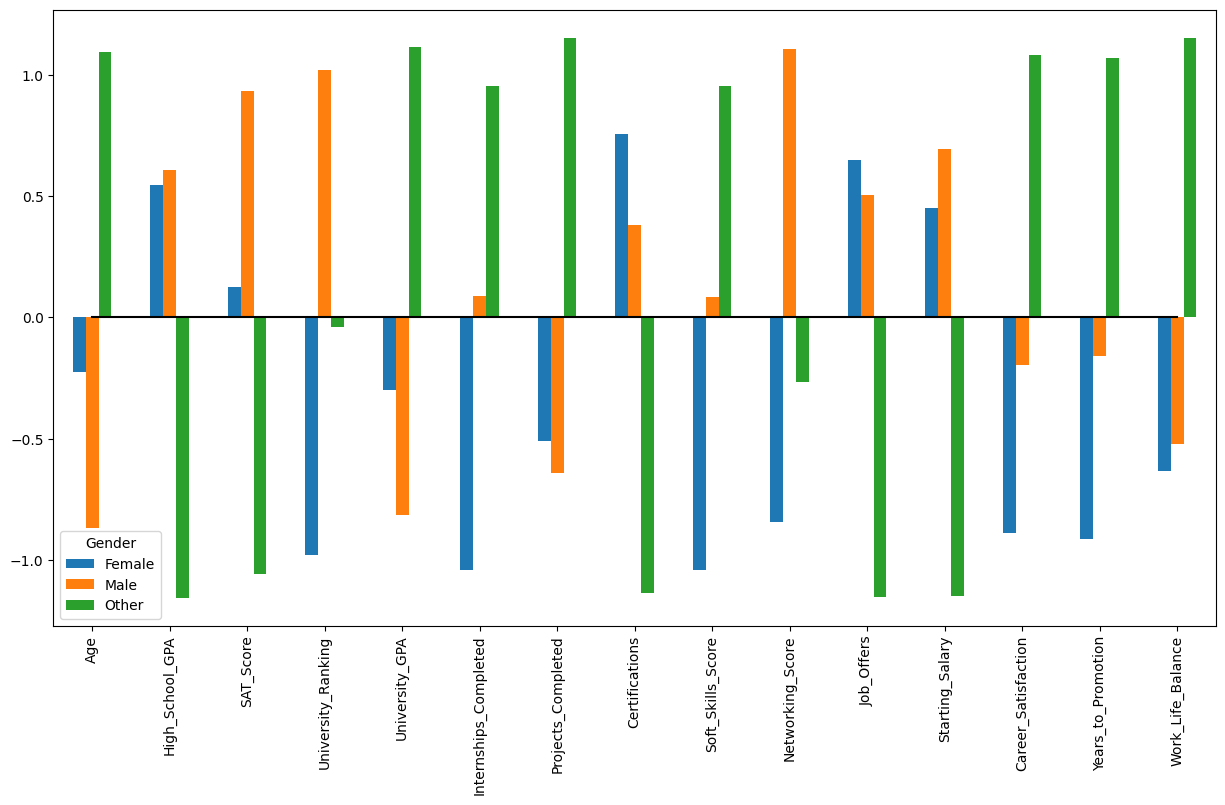

In [4]:
df = load_dataset_part([1,2,3,4])
df_s = df.drop(["Student_ID"], axis=1)
dfs = df_s.groupby("Gender").mean(numeric_only=True)
normalized_df=(dfs-dfs.mean())/dfs.std()
normalized_df.T.plot(kind='bar', figsize=(15,8))
plt.plot([i for i in range(15)], np.zeros(15), 'k')
plt.show()

La visualisation des données normalisées par genre permet d'identifier d'éventuelles disparités entre les hommes, les femmes et les personnes non-binaires (catégorie "Other").

On remarque que la différence globale est toujours presque compris dans $ \pm 1 \sigma $.
Il n'y a donc pas tant de fluctuations entre les genres.

Cependant, on remarque que le genre "Other" est en moyenne plus souvent proche des $ \pm 1 \sigma $ que les autres genres.

Entre hommes et femmes, c'est assez difficile de dire qui est le plus avantagé, car en moyenne, il y a autant de bar pour les femmes que pour les hommes qui sont éloigné de la moyenne.

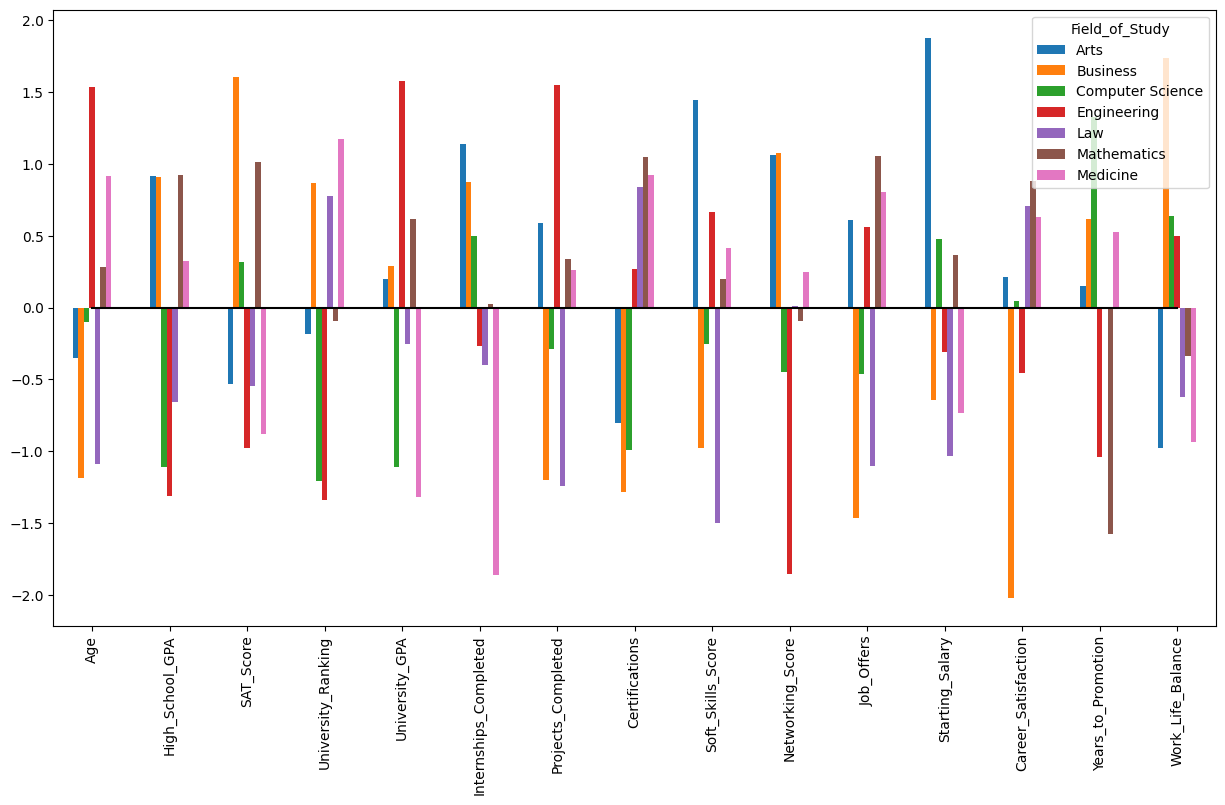

In [5]:
df = load_dataset_part([1,2,3,4])
df_s = df.drop(["Student_ID"], axis=1)
dfs = df_s.groupby("Field_of_Study").mean(numeric_only=True)
normalized_df=(dfs-dfs.mean())/dfs.std()
normalized_df.T.plot(kind='bar', figsize=(15,8))
plt.plot([i for i in range(15)], np.zeros(15), 'k')
plt.show()

La comparaison des moyennes normalisées entre les différents domaines d'études (informatique, médecine, commerce, etc.) révèle comment chaque discipline influence les résultats académiques et professionnels.

Contrairement aux genres, les domaines d'études ont des différences plus marquées.

Par exemple, pour tout proportions gardé, les étudiants en médecine ont plus abandonné que les autres étudiants.

De même, les étudiants en buisness sont beaucoup moins satisfait de leurs carrière que les autres étudiants.

Ou encore, les étudiants en arts commencent avec un salaire plus élevé que les autres étudiants. 

(etc...)

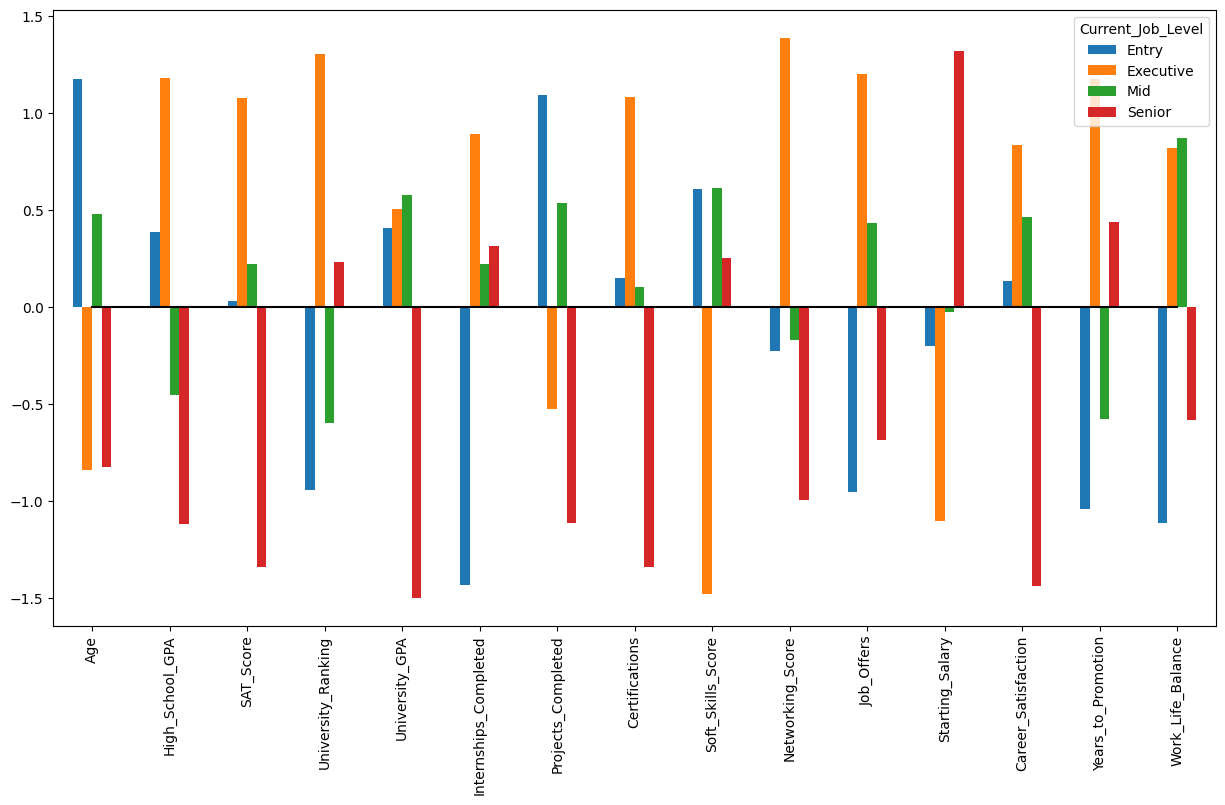

Current_Job_Level
Entry        2463
Mid          1544
Senior        770
Executive     223
Name: count, dtype: int64

In [32]:
df = load_dataset_part([1,2,3,4])
df_s = df.drop(["Student_ID"], axis=1)
dfs = df_s.groupby("Current_Job_Level").mean(numeric_only=True)
normalized_df=(dfs-dfs.mean())/dfs.std()
normalized_df.T.plot(kind='bar', figsize=(15,8))
plt.plot([i for i in range(15)], np.zeros(15), 'k')
plt.show()
df_s.loc[:, "Current_Job_Level"].value_counts()

L'analyse par niveau d'emploi (Entry, Mid, Senior, Executive) illustre les facteurs qui influencent le début de carrière professionnel.

Déjà on remarque que la majorité des étudiants sortant sont à un niveau d'emploi "Entry" et "Mid".

On remarque que pour les étudiants qui deviennent "Executive" sont des cas particuliers par rapport aux autres étudiants:
Ils proviennent de l'université avec un GPA plus faible (étrangement), ils ont moins de certifications, ils commencent avec un salaire beaucoup plus élevé et sont moins satisfait de leur carrière.

Evidement sur ces 3 graphiques, on peut extraire plus d'informations et de corrélations, ainsi que de chercher les causes de ces corrélations et informations.

## Etude de corrélations 

In [33]:
df = load_dataset_part([3]).drop(["Student_ID"], axis=1)

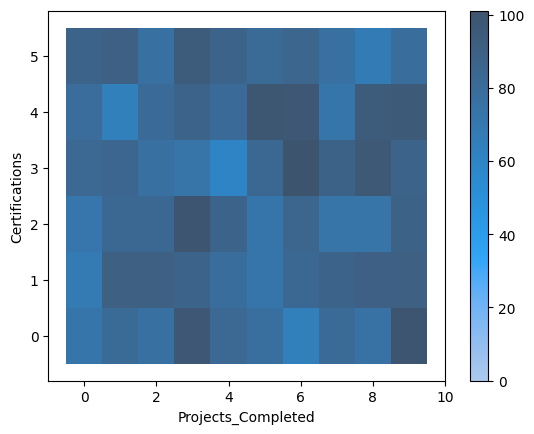

In [10]:
sns.histplot(x=df["Projects_Completed"], y=df["Certifications"], data=df, bins=21, cbar=True, discrete=(True, True))
plt.show()

On remarque ici que la quantité de certification et le nombre de projets réalisés et finis ne sont pas corrélés.

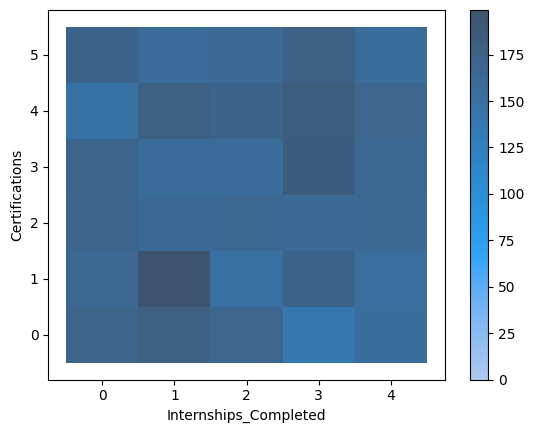

In [11]:
sns.histplot(x=df["Internships_Completed"], y=df["Certifications"], data=df, bins=21, cbar=True, discrete=(True, True))
plt.show()

De même pour le nombre de stages réalisés et le nombre de certifications.

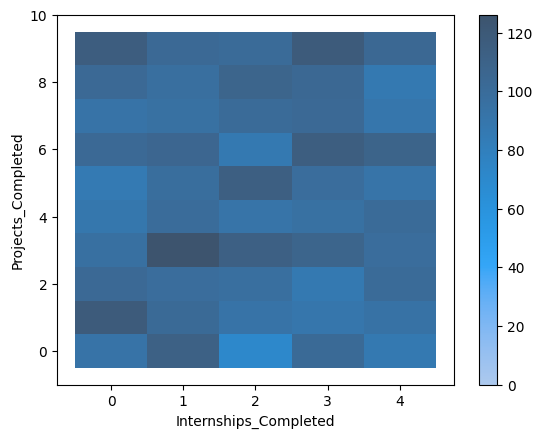

In [12]:
sns.histplot(x=df["Internships_Completed"], y=df["Projects_Completed"], data=df, bins=21, cbar=True, discrete=(True, True))
plt.show()

Et enfin, le nombre de stages réalisés et le nombre de projets réalisés ne sont pas corrélés, également.

In [36]:
df.corr()

,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score
Internships_Completed,1.000000,0.013750,0.023569,0.034905,0.004430
Projects_Completed,0.013750,1.000000,-0.010602,0.015033,0.000466
Certifications,0.023569,-0.010602,1.000000,-0.014266,-0.001476
Soft_Skills_Score,0.034905,0.015033,-0.014266,1.000000,0.010198
Networking_Score,0.004430,0.000466,-0.001476,0.010198,1.000000


De façon plus concises, on a le tableau de corrélation qui peut etre généré par la fonction `corr()` de pandas.

Regardons maintenant si il y a d'autres corrélations intéressantes.

In [21]:
df = load_dataset_part([2,4]).drop(["Student_ID", "Field_of_Study", "Current_Job_Level", "Entrepreneurship"], axis=1)
df.corr()

,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
High_School_GPA,1.000000,-0.018129,0.014341,0.004969,0.016809,-0.009152,-0.023750,-0.009684,-0.018028
SAT_Score,-0.018129,1.000000,0.006149,0.017922,0.019301,0.002776,0.002960,0.015944,0.017031
University_Ranking,0.014341,0.006149,1.000000,-0.004471,0.013199,0.021368,-0.011613,0.000803,0.011669
University_GPA,0.004969,0.017922,-0.004471,1.000000,-0.014875,0.001022,-0.003371,0.011024,0.018964
Job_Offers,0.016809,0.019301,0.013199,-0.014875,1.000000,-0.034014,-0.007675,0.016932,-0.009564
Starting_Salary,-0.009152,0.002776,0.021368,0.001022,-0.034014,1.000000,0.002422,0.005674,0.006371
Career_Satisfaction,-0.023750,0.002960,-0.011613,-0.003371,-0.007675,0.002422,1.000000,-0.006322,0.015988
Years_to_Promotion,-0.009684,0.015944,0.000803,0.011024,0.016932,0.005674,-0.006322,1.000000,0.007336
Work_Life_Balance,-0.018028,0.017031,0.011669,0.018964,-0.009564,0.006371,0.015988,0.007336,1.000000


On remarque étrangement qu'il n'y pas de corrélation entre les paramètres du dataset.

Regardons maintenant si il y a des corrélations entre les offres d'emplois et le domaine d'étude.

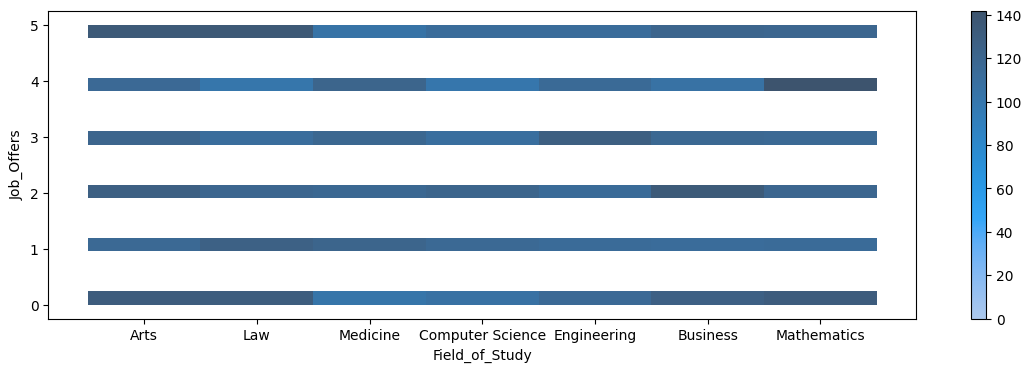

Field_of_Study
Arts                749
Mathematics         745
Law                 727
Business            719
Engineering         701
Medicine            689
Computer Science    670
Name: count, dtype: int64

In [37]:
df = load_dataset_part([2,4])
plt.figure(figsize=(14, 4))  # Largeur de 14 pouces et hauteur de 8 pouces
sns.histplot(x=df["Field_of_Study"], y=df["Job_Offers"], data=df, bins=21, cbar=True)
plt.show()
df.loc[:,"Field_of_Study"].value_counts()

Les domaines d'études sont globalement homogénes.

Il y a peu de disparités entre les domaines d'études concernant les offres d'emplois.

In [ ]:
df_s = df.drop(["Student_ID"], axis=1)
df_s.groupby(by=["Field_of_Study"]).std(numeric_only=True)

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA
Field_of_Study,,,,,
Arts,3.413071,0.579034,202.449329,293.319801,0.560816
Business,3.561422,0.566837,209.122660,289.896399,0.581563
Computer Science,3.505263,0.564554,201.203451,288.424376,0.582753
Engineering,3.436503,0.581334,207.811408,286.145723,0.566666
Law,3.485180,0.574225,203.900057,287.092515,0.580266
Mathematics,3.421586,0.572706,201.656306,298.833068,0.575160
Medicine,3.487027,0.590522,195.656598,293.895378,0.583282
